# Table7. Canal closure and rebellions: major distortions

In [1]:
cd "/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCanal157781-V1"

. cd "/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_referen
> ces/RebelCanal157781-V1"
/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1


In [2]:
adopath ++ "/Users/chengjun/Library/Application Support/Stata/ado/plus/"


  [1]              "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [2]  (BASE)      "/Applications/Stata/ado/base/"
  [3]  (SITE)      "/Applications/Stata/ado/site/"
  [4]              "."
  [5]  (PERSONAL)  "/Users/chengjun/Documents/Stata/ado/personal/"
  [6]  (PLUS)      "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [7]  (OLDPLACE)  "~/ado/"
  [8]              "/opt/anaconda3/lib/python3.8/site-packages/stata_kernel/ado"


In [3]:
**************************************************************************
*** Set up
**************************************************************************
use "Data/Final/rebellion.dta", clear
run "Program/Analysis/generalsetup.do"


**************************************************************************
*** Table7. Canal closure and rebellions: major distortions
**************************************************************************
*** Panel A: Excluding Affected Counties
*** Stata represents a missing value as a very large number and displays it as a dot ("."). 
*** You can use the dot in logical expression but you should use var <= .
gen taipingregion=(Taiping>=2) if Taiping<.
gen triple1 =alongcanal*reform*opiumbattle
gen triple1a=opiumbattle*reform
gen triple2 =alongcanal*reform*taipingregion
gen triple2a=taipingregion*reform
label variable interaction1 "Canal $ \times $ Post"
label variable triple1  "Canal $ \times $ Opium Battlefield $\times$ Post"
label variable triple1a "Opium Battlefield $ \times $ Post"
label variable triple2  "Canal $ \times $ Taiping $\times$ Post"
label variable triple2a "Taiping $ \times $ Post"


In [4]:
su Taiping


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
     Taiping |    150,650    1.250435    1.191231          0          3


In [5]:
** hist Taiping

In [6]:
ta Taiping


    Taiping |
   Heavenly |
    Kingdom |
   Severity |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |     58,688       38.96       38.96
          1 |     29,606       19.65       58.61
          2 |     28,296       18.78       77.39
          3 |     34,060       22.61      100.00
------------+-----------------------------------
      Total |    150,650      100.00


In [7]:
set more off

In [8]:
*** omtopium1
preserve

keep if opiumbattle==0
reghdfe $Y $X, absorb(OBJECTID year c.ashprerebels#i.year i.prefid#c.year i.provid#i.year) cluster(OBJECTID)

eststo omtopium1 
tab OBJECTID if e(sample)
scalar groups=r(r)
su onset_all if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:omtopium1
estadd scalar N_g=groups:omtopium1

restore

preserve

keep if opiumbattle==0
hdfe $Y $X, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001)  keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $X, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V))
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: omtopium1 

restore




(1,572 observations deleted)

(MWFE estimator converged in 8 iterations)

HDFE Linear regression                            Number of obs   =    138,860
Absorbing 5 HDFE groups                           F(   1,    529) =       6.31
Statistics robust to heteroskedasticity           Prob > F        =     0.0123
                                                  R-squared       =     0.0666
                                                  Adj R-squared   =     0.0499
                                                  Within R-sq.    =     0.0002
Number of clusters (OBJECTID) =        530        Root MSE        =     0.3815

                             (Std. err. adjusted for 530 clusters in OBJECTID)
------------------------------------------------------------------------------
             |               Robust
ash~ypop1600 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .

        520 |        262        0.19       23.96
        521 |        262        0.19       24.15
        523 |        262        0.19       24.34
        524 |        262        0.19       24.53
        525 |        262        0.19       24.72
        526 |        262        0.19       24.91
        527 |        262        0.19       25.09
        528 |        262        0.19       25.28
        529 |        262        0.19       25.47
        530 |        262        0.19       25.66
        531 |        262        0.19       25.85
        532 |        262        0.19       26.04
        533 |        262        0.19       26.23
        534 |        262        0.19       26.42
        535 |        262        0.19       26.60
        536 |        262        0.19       26.79
        537 |        262        0.19       26.98
        538 |        262        0.19       27.17
        539 |        262        0.19       27.36
        540 |        262        0.19       27.55
        541 |       

        695 |        262        0.19       55.66
        696 |        262        0.19       55.85
        697 |        262        0.19       56.04
        698 |        262        0.19       56.23
        699 |        262        0.19       56.42
        700 |        262        0.19       56.60
        701 |        262        0.19       56.79
        702 |        262        0.19       56.98
        703 |        262        0.19       57.17
        705 |        262        0.19       57.36
        706 |        262        0.19       57.55
        707 |        262        0.19       57.74
        708 |        262        0.19       57.92
        709 |        262        0.19       58.11
        710 |        262        0.19       58.30
        711 |        262        0.19       58.49
        712 |        262        0.19       58.68
        713 |        262        0.19       58.87
        714 |        262        0.19       59.06
        715 |        262        0.19       59.25
        717 |       

       1051 |        262        0.19       87.36
       1052 |        262        0.19       87.55
       1053 |        262        0.19       87.74
       1054 |        262        0.19       87.92
       1055 |        262        0.19       88.11
       1056 |        262        0.19       88.30
       1057 |        262        0.19       88.49
       1058 |        262        0.19       88.68
       1059 |        262        0.19       88.87
       1060 |        262        0.19       89.06
       1061 |        262        0.19       89.25
       1062 |        262        0.19       89.43
       1063 |        262        0.19       89.62
       1064 |        262        0.19       89.81
       1065 |        262        0.19       90.00
       1066 |        262        0.19       90.19
       1067 |        262        0.19       90.38
       1068 |        262        0.19       90.57
       1069 |        262        0.19       90.75
       1070 |        262        0.19       90.94
       1071 |       

In [9]:
esttab omtopium1 


----------------------------
                      (1)   
             ash~ypop1600   
----------------------------
interaction1       0.0438*  
                   (2.51)   

_cons              0.0313***
                  (41.94)   
----------------------------
N                  138860   
----------------------------
t statistics in parentheses
* p<0.05, ** p<0.01, *** p<0.001


In [10]:
*** omttaiping1
preserve
keep if Taiping<2
reghdfe $Y $X, absorb(OBJECTID year c.ashprerebels#i.year i.prefid#c.year i.provid#i.year) cluster(OBJECTID)
eststo omttaiping1  
tab OBJECTID if e(sample)
scalar groups=r(r)
su onset_all if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:omttaiping1
estadd scalar N_g=groups:omttaiping1
restore

preserve
keep if Taiping<2 
hdfe $Y $X, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001)  keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $X, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V))
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: omttaiping1
restore



(62,356 observations deleted)

(MWFE estimator converged in 8 iterations)

HDFE Linear regression                            Number of obs   =     79,648
Absorbing 5 HDFE groups                           F(   1,    303) =       7.29
Statistics robust to heteroskedasticity           Prob > F        =     0.0073
                                                  R-squared       =     0.0943
                                                  Adj R-squared   =     0.0689
                                                  Within R-sq.    =     0.0007
Number of clusters (OBJECTID) =        304        Root MSE        =     0.4125

                             (Std. err. adjusted for 304 clusters in OBJECTID)
------------------------------------------------------------------------------
             |               Robust
ash~ypop1600 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   

        673 |        262        0.33       41.78
        674 |        262        0.33       42.11
        675 |        262        0.33       42.43
        676 |        262        0.33       42.76
        677 |        262        0.33       43.09
        678 |        262        0.33       43.42
        679 |        262        0.33       43.75
        680 |        262        0.33       44.08
        681 |        262        0.33       44.41
        682 |        262        0.33       44.74
        684 |        262        0.33       45.07
        685 |        262        0.33       45.39
        686 |        262        0.33       45.72
        689 |        262        0.33       46.05
        803 |        262        0.33       46.38
        804 |        262        0.33       46.71
        805 |        262        0.33       47.04
        806 |        262        0.33       47.37
        807 |        262        0.33       47.70
        808 |        262        0.33       48.03
        809 |       

       1109 |        262        0.33       97.04
       1110 |        262        0.33       97.37
       1112 |        262        0.33       97.70
       1113 |        262        0.33       98.03
       1114 |        262        0.33       98.36
       1115 |        262        0.33       98.68
       1116 |        262        0.33       99.01
       1117 |        262        0.33       99.34
       1123 |        262        0.33       99.67
       1124 |        262        0.33      100.00
------------+-----------------------------------
      Total |     79,648      100.00



    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
   onset_all |     79,648    .0086757    .0964553          0          3






(62,356 observations deleted)

(cachevars: year OBJECTID)
(converged in 7 iterations)

 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CO

In [11]:
esttab omttaiping1


----------------------------
                      (1)   
             ash~ypop1600   
----------------------------
interaction1        0.103** 
                   (2.70)   

_cons              0.0362***
                  (39.82)   
----------------------------
N                   79648   
----------------------------
t statistics in parentheses
* p<0.05, ** p<0.01, *** p<0.001


In [13]:
*** Panel B: Interactions
reghdfe $Y interaction1 triple1a triple1, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.prefid#c.year i.provid#i.year) cluster(OBJECTID)
est store opium1
tab OBJECTID if e(sample)
scalar groups=r(r)
su onset_all if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:opium1
estadd scalar N_g=groups:opium1 

reghdfe $Y interaction1 triple2a triple2, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.prefid#c.year i.provid#i.year) cluster(OBJECTID)
est store taiping1
tab OBJECTID if e(sample)
scalar groups=r(r)
su onset_all if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:taiping1
estadd scalar N_g=groups:taiping1

preserve
hdfe $Y interaction1 triple1a triple1, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y interaction1 triple1a triple1, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V))
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: opium1 
restore

preserve
hdfe $Y interaction1 triple2a triple2, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y interaction1 triple2a triple2, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V))
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: taiping1 
restore



(MWFE estimator converged in 8 iterations)

HDFE Linear regression                            Number of obs   =    140,432
Absorbing 5 HDFE groups                           F(   3,    535) =       3.84
Statistics robust to heteroskedasticity           Prob > F        =     0.0097
                                                  R-squared       =     0.0663
                                                  Adj R-squared   =     0.0497
                                                  Within R-sq.    =     0.0002
Number of clusters (OBJECTID) =        536        Root MSE        =     0.3799

                             (Std. err. adjusted for 536 clusters in OBJECTID)
------------------------------------------------------------------------------
             |               Robust
ash~ypop1600 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0437385   .0174153     2.51   0

        515 |        262        0.19       23.13
        516 |        262        0.19       23.32
        517 |        262        0.19       23.51
        518 |        262        0.19       23.69
        519 |        262        0.19       23.88
        520 |        262        0.19       24.07
        521 |        262        0.19       24.25
        522 |        262        0.19       24.44
        523 |        262        0.19       24.63
        524 |        262        0.19       24.81
        525 |        262        0.19       25.00
        526 |        262        0.19       25.19
        527 |        262        0.19       25.37
        528 |        262        0.19       25.56
        529 |        262        0.19       25.75
        530 |        262        0.19       25.93
        531 |        262        0.19       26.12
        532 |        262        0.19       26.31
        533 |        262        0.19       26.49
        534 |        262        0.19       26.68
        535 |       

        687 |        262        0.19       54.48
        689 |        262        0.19       54.66
        690 |        262        0.19       54.85
        691 |        262        0.19       55.04
        692 |        262        0.19       55.22
        693 |        262        0.19       55.41
        694 |        262        0.19       55.60
        695 |        262        0.19       55.78
        696 |        262        0.19       55.97
        697 |        262        0.19       56.16
        698 |        262        0.19       56.34
        699 |        262        0.19       56.53
        700 |        262        0.19       56.72
        701 |        262        0.19       56.90
        702 |        262        0.19       57.09
        703 |        262        0.19       57.28
        704 |        262        0.19       57.46
        705 |        262        0.19       57.65
        706 |        262        0.19       57.84
        707 |        262        0.19       58.02
        708 |       

       1042 |        262        0.19       85.82
       1043 |        262        0.19       86.01
       1044 |        262        0.19       86.19
       1045 |        262        0.19       86.38
       1046 |        262        0.19       86.57
       1047 |        262        0.19       86.75
       1048 |        262        0.19       86.94
       1049 |        262        0.19       87.13
       1050 |        262        0.19       87.31
       1051 |        262        0.19       87.50
       1052 |        262        0.19       87.69
       1053 |        262        0.19       87.87
       1054 |        262        0.19       88.06
       1055 |        262        0.19       88.25
       1056 |        262        0.19       88.43
       1057 |        262        0.19       88.62
       1058 |        262        0.19       88.81
       1059 |        262        0.19       88.99
       1060 |        262        0.19       89.18
       1061 |        262        0.19       89.37
       1062 |       

        361 |        262        0.19        7.65
        362 |        262        0.19        7.84
        364 |        262        0.19        8.02
        365 |        262        0.19        8.21
        366 |        262        0.19        8.40
        367 |        262        0.19        8.58
        368 |        262        0.19        8.77
        369 |        262        0.19        8.96
        370 |        262        0.19        9.14
        371 |        262        0.19        9.33
        372 |        262        0.19        9.51
        373 |        262        0.19        9.70
        374 |        262        0.19        9.89
        375 |        262        0.19       10.07
        376 |        262        0.19       10.26
        377 |        262        0.19       10.45
        378 |        262        0.19       10.63
        379 |        262        0.19       10.82
        380 |        262        0.19       11.01
        381 |        262        0.19       11.19
        443 |       

        600 |        262        0.19       38.99
        601 |        262        0.19       39.18
        602 |        262        0.19       39.37
        603 |        262        0.19       39.55
        604 |        262        0.19       39.74
        605 |        262        0.19       39.93
        606 |        262        0.19       40.11
        607 |        262        0.19       40.30
        608 |        262        0.19       40.49
        609 |        262        0.19       40.67
        610 |        262        0.19       40.86
        611 |        262        0.19       41.04
        612 |        262        0.19       41.23
        613 |        262        0.19       41.42
        614 |        262        0.19       41.60
        615 |        262        0.19       41.79
        616 |        262        0.19       41.98
        617 |        262        0.19       42.16
        618 |        262        0.19       42.35
        619 |        262        0.19       42.54
        620 |       

        858 |        262        0.19       70.34
        859 |        262        0.19       70.52
        860 |        262        0.19       70.71
        861 |        262        0.19       70.90
        862 |        262        0.19       71.08
        863 |        262        0.19       71.27
        864 |        262        0.19       71.46
        865 |        262        0.19       71.64
        866 |        262        0.19       71.83
        867 |        262        0.19       72.01
        868 |        262        0.19       72.20
        869 |        262        0.19       72.39
        870 |        262        0.19       72.57
        871 |        262        0.19       72.76
        872 |        262        0.19       72.95
        873 |        262        0.19       73.13
        874 |        262        0.19       73.32
        875 |        262        0.19       73.51
        876 |        262        0.19       73.69
        877 |        262        0.19       73.88
        878 |       


 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  interaction1 triple1a triple1
 
SPATIAL CORRELATION KERNAL CUTOFF: 500 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
interaction1 |   .0439854   .0170185     2.58   0.010     .0106294    .0773414
    triple1a |  -.0230222   .0179036    -1.29   0.198    -.0581129    .0120685
     triple1 |  -.0338523   .0255822    -1.32   0.186    -.0839929    .0162883
------------------------------------------------------------------------------
 
STANDARD ERRORS UNDER OLS, WITH SPATIAL CORRECTION AND WITH SPATIAL AND SERIAL C
> ORRECTION:

----------------------------------------

In [14]:
*** Get indicators of FEs
estfe omtopium1 omttaiping1 opium1 taiping1

In [15]:
**************************************************************************
*** Set up table elements for Latex
**************************************************************************


*** Title
global caption "Canal closure and rebellions: major distortions"

*** Table head
#delimit ;
global head
    \begin{table}[htb]\centering
    \caption{$caption } \begin{adjustbox}{max width=\textwidth}  \begin{threeparttable}
    \begin{tabular}{l*{4}{c}}
	\toprule\toprule 
	&\multicolumn{4}{c}{\textit{Dependent Variable:} Rebellions} \\ 
	&\multicolumn{2}{c}{Panel A} &\multicolumn{2}{c}{Panel B} \\  
	[.1cm] \cmidrule(lr){2-3} \cmidrule(lr){4-5}
	;
#delimit cr
*** Table notes
run "Program/Analysis/generalnotes.do"
global note_panel "Panel A excludes counties that suffered from battles During the Opium War (column 1) or the Taiping Rebellion (column 2). Panel B examines the heterogeneous effects in those regions."
global note_canal "$ Canal $ is an indicator that equals one if the county is adjacent to the canal. "
global note_opium "$ Opium\ Battlefield $ is an indicator that equals one if the county was one of the battlefields during the First Opium War. "
global note_taiping "$ Taiping $ is an indicator that equals one if the county was one of the battlefields during the Taiping Rebellion. "
global notes "\begin{tablenotes}\footnotesize{\item \textit{Note.} $note_panel $note_sample $note_dep $note_canal $note_opium $note_taiping $note_post $note_std $note_conley }\end{tablenotes}"

In [16]:
**************************************************************************
*** Export to Latex
**************************************************************************
esttab omtopium1 omttaiping1 opium1 taiping1 ///
	   using "Results/Tables/table7.tex", booktabs nonotes compress label nomtitles ///
                                   cells(b(fmt(4)) se(fmt(4) par(( ))) sesp(fmt(4) par([ ]) drop(_cons))) ///
							       collabels("",none) ///
                                   stats(depavg N N_g r2_a,fmt(4 %7.0fc 0 4) labels("Mean of the Dependent Variable" "No. of Observations" "No. of Counties" "Adjusted R-squared")) ///
								   indicate("County FE =0.OBJECTID" "Year FE=0.year" "Pre-reform rebellion $\times$ Year FE=0.year#c.ashprerebels" "Province $\times$ Year FE=0.provid#0.year"  "Prefecture Year Trend=0.prefid#c.year") ///
    							   prehead($head ) ///
                                   postfoot(\bottomrule\end{tabular}$notes\end{threeparttable}\end{adjustbox}\end{table}) ///
                                   $stars ///
                                   replace


(output written to Results/Tables/table7.tex)


In [18]:
esttab omtopium1 omttaiping1 opium1 taiping1 , ///
   cells(b(fmt(4)) se(fmt(4) par(( ))) sesp(fmt(4) par([ ]) drop(_cons))) ///
   collabels("",none) ///
   stats(depavg N N_g r2_a,fmt(4 %7.0fc 0 4) labels("Mean of the Dependent Variable" "No. of Observations" "No. of Counties" "Adjusted R-squared")) ///
   indicate("County FE =0.OBJECTID" "Year FE=0.year" "Pre-reform rebellion $\times$ Year FE=0.year#c.ashprerebels" "Province $\times$ Year FE=0.provid#0.year"  "Prefecture Year Trend=0.prefid#c.year") ///
   prehead($head ) ///
   postfoot(\bottomrule\end{tabular}$notes\end{threeparttable}\end{adjustbox}\end{table}) ///
   $stars ///
   replace



\begin{table}[htb]\centering     \caption{Canal closure and rebellions: major di
> stortions } \begin{adjustbox}{max width=\textwidth}  \begin{threeparttable}   
>   \begin{tabular}{l*{4}{c}}  \toprule\toprule   &\multicolumn{4}{c}{\textit{De
> pendent Variable:} Rebellions} \\   &\multicolumn{2}{c}{Panel A} &\multicolumn
> {2}{c}{Panel B} \\    [.1cm] \cmidrule(lr){2-3} \cmidrule(lr){4-5} 
                      (1)          (2)          (3)          (4)
             ash~ypop1600 ash~ypop1600 ash~ypop1600 ash~ypop1600
----------------------------------------------------------------
interaction1       0.0438       0.1032       0.0437       0.1034
                 (0.0175)     (0.0382)     (0.0174)     (0.0365)
                 [0.0171]     [0.0367]     [0.0170]     [0.0356]
triple1a                                    -0.0230             
                                           (0.0198)             
                                           [0.0179]             
triple1            

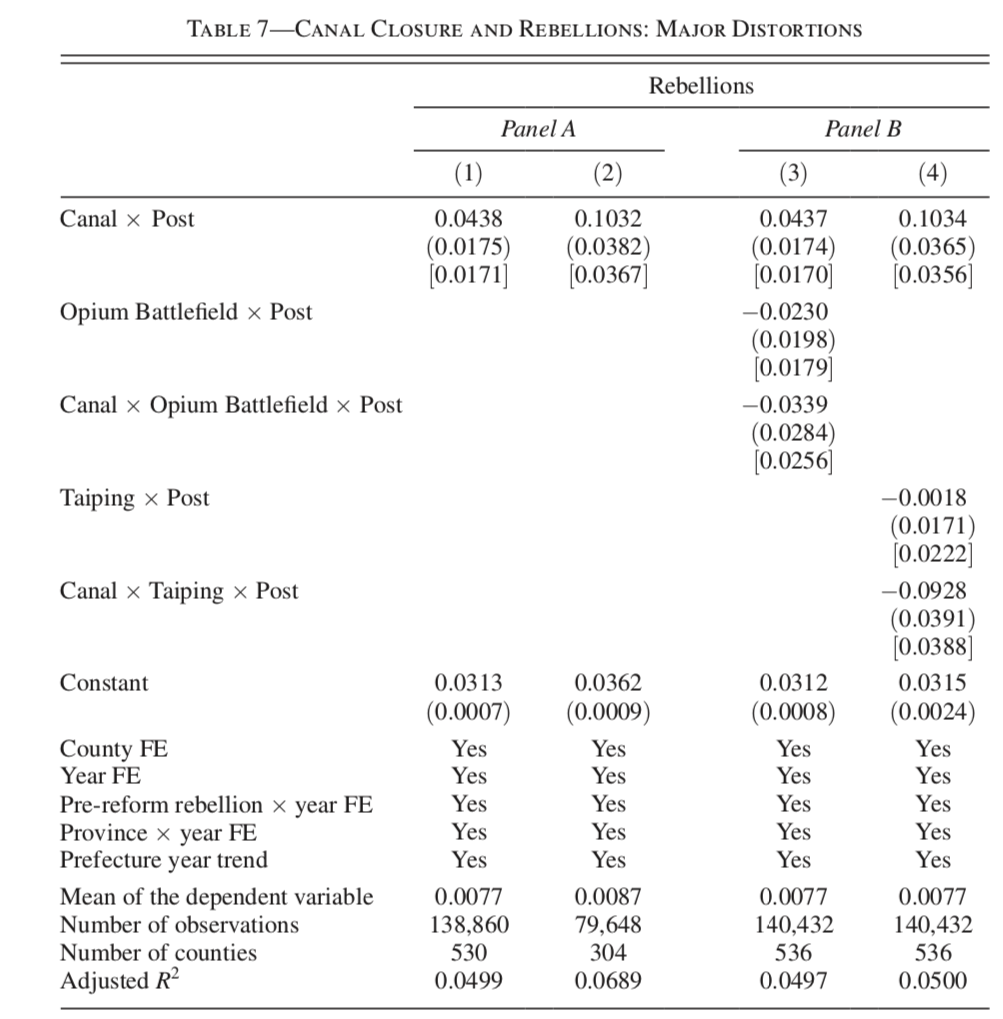